# Problem Description : Crime Detection Regression Analysis

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Flatten,Input
from keras import backend as K
from keras.models import Model, load_model
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from scipy.spatial import distance
from sklearn.decomposition import PCA
from numpy import linalg as LA
from keras.objectives import categorical_crossentropy
from sklearn.metrics import roc_curve, auc
import math
from scipy.stats import pearsonr
import copy
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import itertools
import csv
from sklearn import metrics
import tensorflow as tf
import tensorflow.contrib.layers as tl
import numpy as np
import pandas as pd 
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
import seaborn as sb
%matplotlib inline

/home/ramchalamkr/.local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Steps

## 1. Checking Data

In [18]:
X = pd.read_csv('crime_prep.csv',delimiter=',')
print X.shape
X[0:20]

(1994, 128)


,target,v_cont_0,v_cat_0,v_cat_1,v_cat_2,v_cat_3,v_cont_5,v_cont_6,v_cont_7,v_cont_8,...,v_cont_117,v_cont_118,v_cont_119,v_cont_120,v_cont_121,v_cont_122,v_cont_123,v_cont_124,v_cont_125,v_cont_126
0,0.20,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,...,0.29,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14
1,0.67,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,...,NaN,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN
2,0.43,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,...,NaN,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN
3,0.12,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,...,NaN,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN
4,0.03,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,...,NaN,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN
5,0.14,6,NaN,NaN,SouthPasadenacity,1,0.02,0.28,0.06,0.54,...,NaN,0.01,0.58,0.10,NaN,NaN,NaN,NaN,0.00,NaN
6,0.03,44,7.0,41500.0,Lincolntown,1,0.01,0.39,0.00,0.98,...,NaN,0.05,0.08,0.06,NaN,NaN,NaN,NaN,0.00,NaN
7,0.55,6,NaN,NaN,Selmacity,1,0.01,0.74,0.03,0.46,...,NaN,0.01,0.33,0.00,NaN,NaN,NaN,NaN,0.00,NaN
8,0.53,21,NaN,NaN,Hendersoncity,1,0.03,0.34,0.20,0.84,...,NaN,0.04,0.17,0.04,NaN,NaN,NaN,NaN,0.00,NaN
9,0.15,29,NaN,NaN,Claytoncity,1,0.01,0.40,0.06,0.87,...,NaN,0.00,0.47,0.11,NaN,NaN,NaN,NaN,0.00,NaN


## 2. Tidying the data

#### Missing data can either be filled with the means of the features or maybe 0 to ignore them or even other data imputation techniques to predict the missing values
#### In this case the mean of the features is taken for the missing values.

In [19]:
print len(X['v_cat_2'].unique())
X = X.fillna(X.mean())
del X['v_cat_2']
del X['v_cat_3']
Y = X['target']
del X['target']
X.head()

1828


,v_cont_0,v_cat_0,v_cat_1,v_cont_5,v_cont_6,v_cont_7,v_cont_8,v_cont_9,v_cont_10,v_cont_11,...,v_cont_117,v_cont_118,v_cont_119,v_cont_120,v_cont_121,v_cont_122,v_cont_123,v_cont_124,v_cont_125,v_cont_126
0,8,58.826829,46188.336597,0.19,0.33,0.02,0.90,0.12,0.17,0.34,...,0.290000,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000
1,53,58.826829,46188.336597,0.00,0.16,0.12,0.74,0.45,0.07,0.26,...,0.305987,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078
2,24,58.826829,46188.336597,0.00,0.42,0.49,0.56,0.17,0.04,0.39,...,0.305987,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078
3,34,5.000000,81440.000000,0.04,0.77,1.00,0.08,0.12,0.10,0.51,...,0.305987,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078
4,42,95.000000,6096.000000,0.01,0.55,0.02,0.95,0.09,0.05,0.38,...,0.305987,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078


In [20]:
#Standardise certain columns
X['v_cat_0'] = StandardScaler().fit_transform(X['v_cat_0'].values.reshape(-1, 1))
X['v_cat_1'] = StandardScaler().fit_transform(X['v_cat_1'].values.reshape(-1, 1))
X['v_cont_0'] = StandardScaler().fit_transform(X['v_cont_0'].values.reshape(-1, 1))
X.head()

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,v_cont_0,v_cat_0,v_cat_1,v_cont_5,v_cont_6,v_cont_7,v_cont_8,v_cont_9,v_cont_10,v_cont_11,...,v_cont_117,v_cont_118,v_cont_119,v_cont_120,v_cont_121,v_cont_122,v_cont_123,v_cont_124,v_cont_125,v_cont_126
0,-1.261697,0.000000,0.000000,0.19,0.33,0.02,0.90,0.12,0.17,0.34,...,0.290000,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000
1,1.483304,0.000000,0.000000,0.00,0.16,0.12,0.74,0.45,0.07,0.26,...,0.305987,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078
2,-0.285697,0.000000,0.000000,0.00,0.42,0.49,0.56,0.17,0.04,0.39,...,0.305987,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078
3,0.324303,-0.664357,2.178117,0.04,0.77,1.00,0.08,0.12,0.10,0.51,...,0.305987,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078
4,0.812304,0.446467,-2.477211,0.01,0.55,0.02,0.95,0.09,0.05,0.38,...,0.305987,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078


## 3. Exploratory Analysis

### PCA

(1994, 125)
(125, 125)


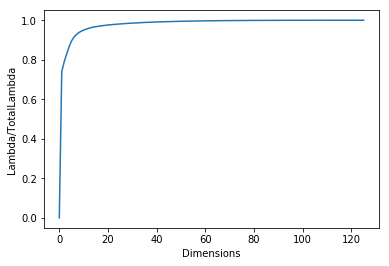

In [21]:
print X.shape
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=42)

Covariance = np.dot(X_train.T,X_train)
print Covariance.shape

Lambda, e = LA.eigh(Covariance)
Lambda = Lambda.reshape(Lambda.shape[0],1)
Lambda = sorted(Lambda,reverse=True)
TotalLambda = np.sum(Lambda)
LambdaProp = []
for i in range(X_train.shape[1]):
    temp = np.sum(Lambda[0:i])*1.0/TotalLambda
    LambdaProp.append(temp)

Dim = np.linspace(0, X_train.shape[1], X_train.shape[1])

plt.plot(Dim,LambdaProp)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.xlabel('Dimensions')
plt.ylabel('Lambda/TotalLambda')
plt.show()

In [23]:
X1 = X
Y1 = Y

for i in (range(1,100)):
    print i
    NewFeatureSet = np.dot(X1,e[:,125-i:125])
    print NewFeatureSet.shape
    X_train,X_test,Y_train,Y_test = train_test_split(NewFeatureSet,Y1,test_size = 0.2,random_state=42)
    #Normal Linear Regression
    regr = linear_model.LinearRegression(normalize = True)
    regr.fit(X_train,Y_train)
    Y_pred = regr.predict(X_test)
    Weights = regr.coef_
    print "RMSE %.2f" % math.sqrt(mean_squared_error(Y_test,Y_pred))
    print('Variance/R2 score: %.2f' % r2_score(Y_test, Y_pred))

1
(1994, 1)
RMSE 0.22
Variance/R2 score: -0.00
2
(1994, 2)
RMSE 0.21
Variance/R2 score: 0.04
3
(1994, 3)
RMSE 0.17
Variance/R2 score: 0.39
4
(1994, 4)
RMSE 0.16
Variance/R2 score: 0.48
5
(1994, 5)
RMSE 0.15
Variance/R2 score: 0.52
6
(1994, 6)
RMSE 0.15
Variance/R2 score: 0.52
7
(1994, 7)
RMSE 0.15
Variance/R2 score: 0.54
8
(1994, 8)
RMSE 0.15
Variance/R2 score: 0.55
9
(1994, 9)
RMSE 0.14
Variance/R2 score: 0.59
10
(1994, 10)
RMSE 0.14
Variance/R2 score: 0.61
11
(1994, 11)
RMSE 0.14
Variance/R2 score: 0.61
12
(1994, 12)
RMSE 0.13
Variance/R2 score: 0.62
13
(1994, 13)
RMSE 0.13
Variance/R2 score: 0.63
14
(1994, 14)
RMSE 0.13
Variance/R2 score: 0.63
15
(1994, 15)
RMSE 0.13
Variance/R2 score: 0.63
16
(1994, 16)
RMSE 0.13
Variance/R2 score: 0.63
17
(1994, 17)
RMSE 0.13
Variance/R2 score: 0.63
18
(1994, 18)
RMSE 0.13
Variance/R2 score: 0.64
19
(1994, 19)
RMSE 0.13
Variance/R2 score: 0.64
20
(1994, 20)
RMSE 0.13
Variance/R2 score: 0.64
21
(1994, 21)
RMSE 0.13
Variance/R2 score: 0.64
22
(1994,

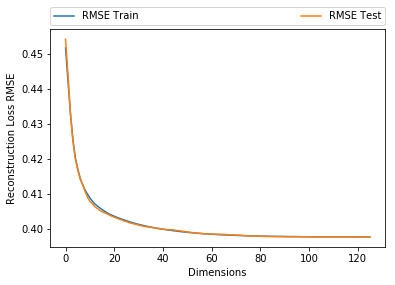

In [24]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=42)
RMSETrain =[]
RMSETest =[]
VarainceRatio = []
Dim = np.linspace(0, X_train.shape[1], X_train.shape[1])
for i in range(1,X_train.shape[1]+1):
    pca = PCA(n_components = i)
    pca.fit(X_train)
    VarainceRatio.append(pca.explained_variance_ratio_)
    X_trainhat = np.dot(pca.transform(X_train)[:,:i], pca.components_[:i,:])
    RMSETrain.append(math.sqrt(mean_squared_error(X_train,X_trainhat)))
    X_testhat = np.dot(pca.transform(X_test)[:,:i], pca.components_[:i,:])
    RMSETest.append(math.sqrt(mean_squared_error(X_test,X_testhat)))
    
plt.plot(Dim,RMSETrain,label="RMSE Train")
plt.plot(Dim,RMSETest,label="RMSE Test")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.xlabel('Dimensions')
plt.ylabel('Reconstruction Loss RMSE')
plt.show()

In [25]:
X1 = X
Y1 = Y
for i in range(1,15):
    pca = PCA(n_components = i)
    X_1 = pca.fit_transform(X1)
    #VarainceRatio.append(pca.explained_variance_ratio_)
    print X_1
    print "no of componenets",i
    print "predict for transformed data"
    
    X_train,X_test,Y_train,Y_test = train_test_split(X_1,Y1,test_size = 0.2,random_state=42)
    #Normal Linear Regression
    regr = linear_model.LinearRegression(normalize = True)
    regr.fit(X_train,Y_train)
    Y_pred = regr.predict(X_test)
    Weights = regr.coef_
    print "RMSE %.2f" % math.sqrt(mean_squared_error(Y_test,Y_pred))
    print('Variance/R2 score: %.2f' % r2_score(Y_test, Y_pred))

    


[[-0.83893174]
 [ 0.91684945]
 [ 0.21196309]
 ...
 [-0.6326288 ]
 [-0.63799423]
 [-1.45620074]]
no of componenets 1
predict for transformed data
RMSE 0.22
Variance/R2 score: -0.02
[[-0.83893174  0.19106065]
 [ 0.91684946 -0.35978791]
 [ 0.21196309  0.41829515]
 ...
 [-0.6326288   0.70376198]
 [-0.63799423 -0.32252535]
 [-1.45620074  1.73787881]]
no of componenets 2
predict for transformed data
RMSE 0.16
Variance/R2 score: 0.49
[[-0.83893174  0.19106065  0.39788124]
 [ 0.91684946 -0.35978791 -0.32442181]
 [ 0.21196309  0.41829515 -0.13784697]
 ...
 [-0.6326288   0.70376198  1.6834653 ]
 [-0.63799423 -0.32252534  1.46103493]
 [-1.45620074  1.73787882  0.58259365]]
no of componenets 3
predict for transformed data
RMSE 0.16
Variance/R2 score: 0.48
[[-0.83893174  0.19106065  0.39788124  0.28589089]
 [ 0.91684946 -0.35978791 -0.32442181 -0.0468139 ]
 [ 0.21196309  0.41829515 -0.13784697 -0.30614276]
 ...
 [-0.6326288   0.70376198  1.6834653  -1.63788755]
 [-0.63799423 -0.32252534  1.46103493

### Feature engineering using Pearson's Coefficient

In [26]:
X = (X - X.mean())
Matrix = X.as_matrix()
#print TrainX['ALSQM_Count']
r=[]
p=[]
for i in range(X.shape[1]):
    t1,t2 = pearsonr(Matrix[:,i],Y)
    #print t1,i,
    r.append((t1,i,X.columns[i],t2))
r.sort()

37


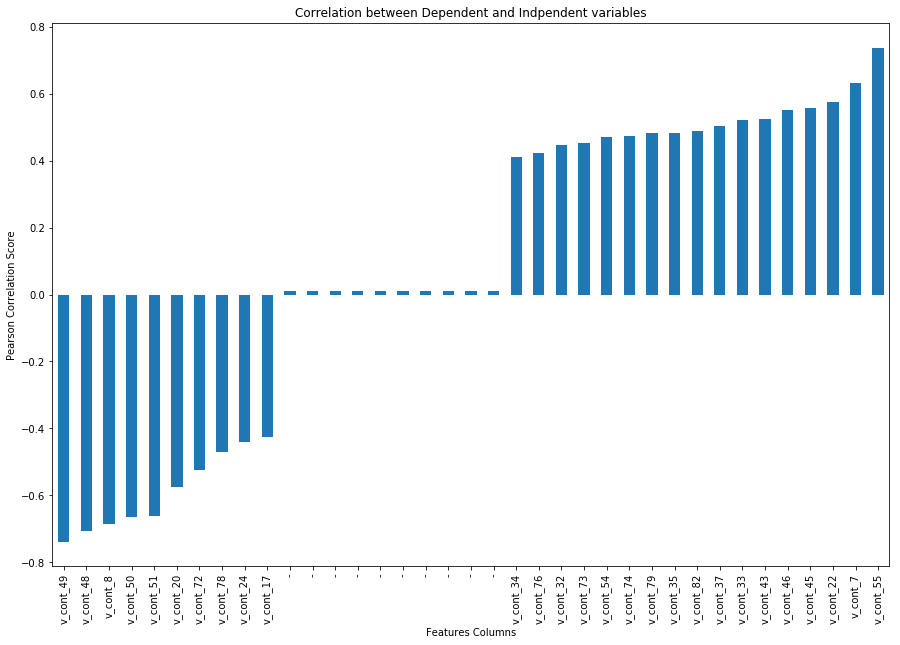

In [27]:
frequencies = []
labels =[]
count=0
for ind,x in enumerate(r):
    if(x[0]<-0.4 or x[0]>0.4):
        frequencies.append(x[0])
        labels.append(x[2])
    else:
        if count<10:
            labels.append('-')
            frequencies.append(0.01)
            count+=1
print len(frequencies)
freq_series = pd.Series.from_array(frequencies)
x_labels = range(len(freq_series))
plt.figure(figsize=(15, 10))
ax = freq_series.plot(kind='bar')
ax.set_title('Correlation between Dependent and Indpendent variables')
ax.set_xlabel('Features Columns')
ax.set_ylabel('Pearson Correlation Score')
rects = ax.patches
ax.set_xticklabels(labels)
plt.show()



In [28]:
IndList =[]
for ind,x in enumerate(r):
    if(x[0]<-0.4 or x[0]>0.4):
        IndList.append(x[1])
CorrList =[]
CorrMatrix = np.zeros((len(IndList),len(IndList)))
Cols =[]
for i in range(len(IndList)):
    Cols.append(X.columns[IndList[i]])
    for j in range(len(IndList)):
        t1,t2 = pearsonr(Matrix[:,IndList[i]],Matrix[:,IndList[j]])
        CorrList.append((t1,IndList[i],X.columns[IndList[i]],IndList[j],X.columns[IndList[j]],t2))
        CorrMatrix[i][j] = t1
print CorrMatrix.shape

(27, 27)


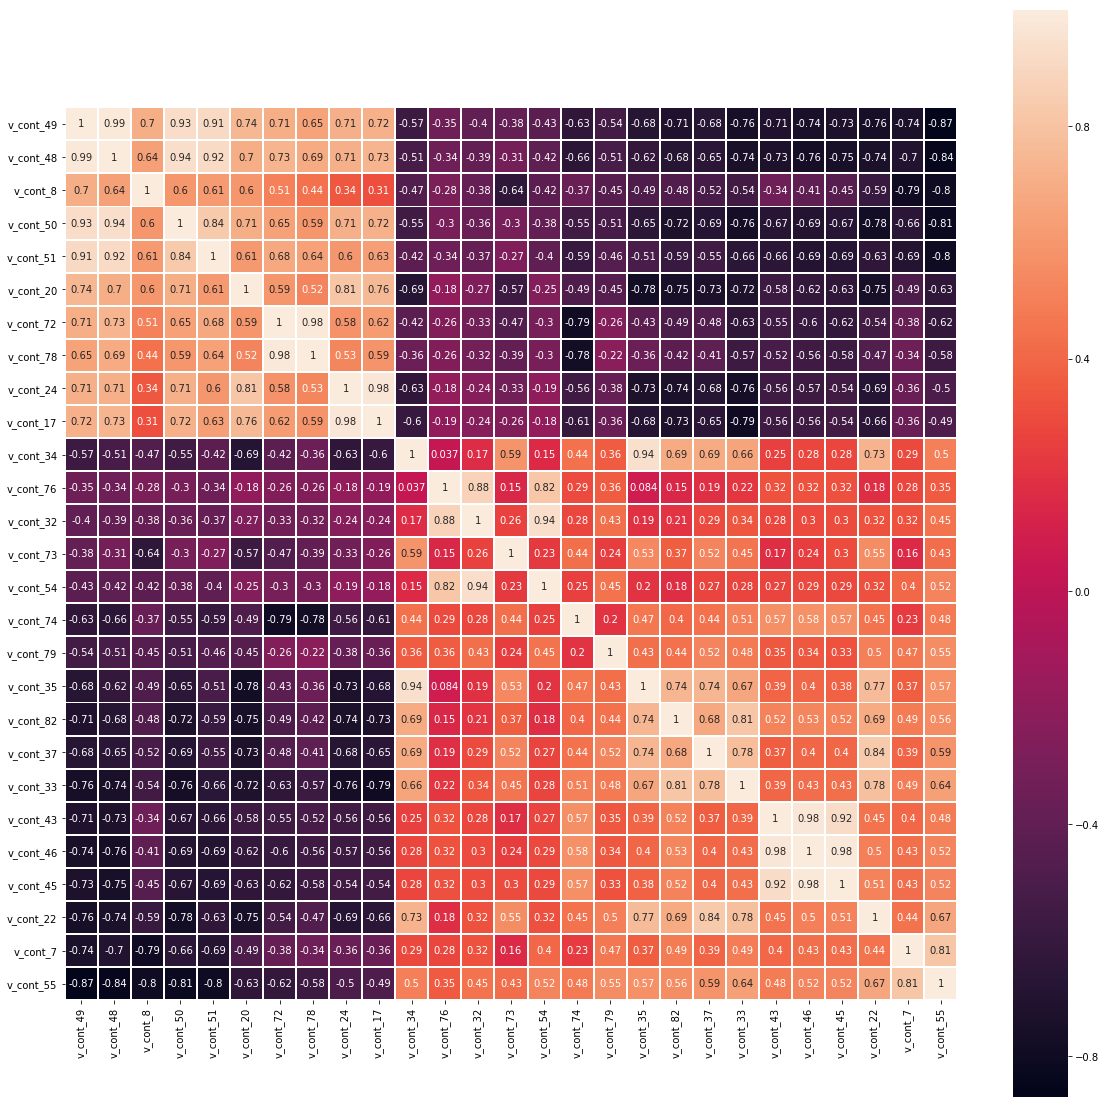

In [29]:
fig, ax = plt.subplots(figsize=(20,20)) 
sb.heatmap(CorrMatrix, 
        xticklabels=Cols,
        yticklabels=Cols,linewidths=1,annot=True, ax=ax,square =True)

plt.show()

## 4. Model Development and Performance

In [30]:
print IndList
t=[]
for i in IndList:
    t.append(X.columns[i])
print t
FinalTrainSet = np.zeros((len(IndList),Matrix.shape[0]))
for ind,i in enumerate(IndList):
    FinalTrainSet[ind] = (Matrix[:,i])
FinalTrainSet = FinalTrainSet.T
print FinalTrainSet.shape
print Y.shape

[47, 46, 6, 48, 49, 18, 70, 76, 22, 15, 32, 74, 30, 71, 52, 72, 77, 33, 80, 35, 31, 41, 44, 43, 20, 5, 53]
['v_cont_49', 'v_cont_48', 'v_cont_8', 'v_cont_50', 'v_cont_51', 'v_cont_20', 'v_cont_72', 'v_cont_78', 'v_cont_24', 'v_cont_17', 'v_cont_34', 'v_cont_76', 'v_cont_32', 'v_cont_73', 'v_cont_54', 'v_cont_74', 'v_cont_79', 'v_cont_35', 'v_cont_82', 'v_cont_37', 'v_cont_33', 'v_cont_43', 'v_cont_46', 'v_cont_45', 'v_cont_22', 'v_cont_7', 'v_cont_55']
(1994, 27)
(1994,)


### Linear Regression

In [31]:

X_train,X_test,Y_train,Y_test = train_test_split(FinalTrainSet,Y,test_size = 0.3,random_state=42)
#Normal Linear Regression
clf = linear_model.LinearRegression(normalize = True)
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
Weights = clf.coef_
print Weights
print "RMSE %.2f" % math.sqrt(mean_squared_error(Y_test,Y_pred))
print('Variance/R2 score: %.2f' % r2_score(Y_test, Y_pred))

# Linear Regression With Ridge regularisation
clf = linear_model.Ridge(alpha = 0.1,normalize = True)
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
print "RMSE %.2f" % math.sqrt(mean_squared_error(Y_test,Y_pred))
print('Variance/R2 score: %.2f' % r2_score(Y_test, Y_pred))


# Linear Regression With Lasso regularisation
clf = linear_model.Lasso(alpha = 0.1,normalize = True)
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
print "RMSE %.2f" % math.sqrt(mean_squared_error(Y_test,Y_pred))
print('Variance/R2 score: %.2f' % r2_score(Y_test, Y_pred))


[-0.06986744 -0.20319033  0.00282052 -0.0764294  -0.00365693 -0.11640938
 -0.3154949   0.35358964  0.21298279 -0.04158515 -0.16352962  0.26255075
  0.12639153  0.2220687  -0.23364425  0.10495532  0.04729825  0.11573447
  0.02870576 -0.05019055 -0.06960878  0.4324694  -0.61741931  0.26619755
  0.05778619  0.19690957  0.16119416]
RMSE 0.13
Variance/R2 score: 0.64
RMSE 0.13
Variance/R2 score: 0.64
RMSE 0.22
Variance/R2 score: -0.01


### Neural Nets

In [32]:
X_train,X_test,Y_train,Y_test = train_test_split(FinalTrainSet,Y,test_size = 0.3,random_state=42)
InputWidth = X_train.shape[1]
K.clear_session()
model = Sequential()
model.add(Dense(128, input_shape = (InputWidth,), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='relu'))
#model.add(Dense(InputWidth, activation='relu'))
print model.summary()
# Compile model
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
op = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), nb_epoch=150, batch_size=64, verbose=2).history
y_pred = model.predict(X_test)
print "RMSE %.2f" % math.sqrt(mean_squared_error(Y_test,Y_pred))
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               3584      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total para

/usr/local/lib/python2.7/dist-packages/keras/models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 1395 samples, validate on 599 samples
Epoch 1/150
14s - loss: 0.0808 - acc: 0.0036 - val_loss: 0.0559 - val_acc: 0.0083
Epoch 2/150
0s - loss: 0.0626 - acc: 0.0050 - val_loss: 0.0459 - val_acc: 0.0083
Epoch 3/150
0s - loss: 0.0555 - acc: 0.0065 - val_loss: 0.0394 - val_acc: 0.0083
Epoch 4/150
0s - loss: 0.0497 - acc: 0.0079 - val_loss: 0.0347 - val_acc: 0.0100
Epoch 5/150
0s - loss: 0.0455 - acc: 0.0115 - val_loss: 0.0313 - val_acc: 0.0100
Epoch 6/150
0s - loss: 0.0406 - acc: 0.0122 - val_loss: 0.0288 - val_acc: 0.0117
Epoch 7/150
0s - loss: 0.0412 - acc: 0.0136 - val_loss: 0.0268 - val_acc: 0.0117
Epoch 8/150
0s - loss: 0.0388 - acc: 0.0143 - val_loss: 0.0255 - val_acc: 0.0117
Epoch 9/150
0s - loss: 0.0375 - acc: 0.0158 - val_loss: 0.0242 - val_acc: 0.0117
Epoch 10/150
0s - loss: 0.0362 - acc: 0.0151 - val_loss: 0.0232 - val_acc: 0.0150
Epoch 11/150
0s - loss: 0.0370 - acc: 0.0151 - val_loss: 0.0226 - val_acc: 0.0150
Epoch 12/150
0s - loss: 0.0334 - acc: 0.0179 - val_loss: 0.

0s - loss: 0.0251 - acc: 0.0208 - val_loss: 0.0182 - val_acc: 0.0184
Epoch 102/150
0s - loss: 0.0256 - acc: 0.0237 - val_loss: 0.0182 - val_acc: 0.0184
Epoch 103/150
0s - loss: 0.0264 - acc: 0.0215 - val_loss: 0.0182 - val_acc: 0.0184
Epoch 104/150
0s - loss: 0.0248 - acc: 0.0244 - val_loss: 0.0182 - val_acc: 0.0184
Epoch 105/150
0s - loss: 0.0258 - acc: 0.0237 - val_loss: 0.0182 - val_acc: 0.0184
Epoch 106/150
0s - loss: 0.0259 - acc: 0.0244 - val_loss: 0.0182 - val_acc: 0.0184
Epoch 107/150
0s - loss: 0.0254 - acc: 0.0251 - val_loss: 0.0182 - val_acc: 0.0184
Epoch 108/150
0s - loss: 0.0261 - acc: 0.0229 - val_loss: 0.0182 - val_acc: 0.0184
Epoch 109/150
0s - loss: 0.0239 - acc: 0.0222 - val_loss: 0.0182 - val_acc: 0.0184
Epoch 110/150
0s - loss: 0.0248 - acc: 0.0251 - val_loss: 0.0182 - val_acc: 0.0184
Epoch 111/150
0s - loss: 0.0243 - acc: 0.0237 - val_loss: 0.0182 - val_acc: 0.0184
Epoch 112/150
0s - loss: 0.0257 - acc: 0.0229 - val_loss: 0.0182 - val_acc: 0.0184
Epoch 113/150
0s -

#### FNN doesnt perform as well possibly due to the limited number of training samples.

In [33]:
HighCorrTuples =[]
LowCorrTuples=[]
Col =[]
ht ={}
CorrCopy = copy.deepcopy(CorrList)
for var in CorrCopy:
    if((var[0]>=0.8 or var[0]<=-0.8) and var[1]!=var[3]):
        if(var[1] not in ht or var[3] not in ht):
            print var
            ht[var[3]] =0
    else:
        LowCorrTuples.append(var)
print len(ht)
FinalFeatureSet =[]
print len(CorrCopy)
for index,var in enumerate(CorrCopy):
    if(not(var[1] in ht or var[3] in ht)):
        #print var
        FinalFeatureSet.append(var)
print len(CorrList)
print len(CorrCopy)
print len(FinalFeatureSet)
'''
assert(len(HighCorrTuples)+len(LowCorrTuples)==len(Corr))
UncorrelatedFeatureIndices=[]

for i in HighCorrTuples:
    UncorrelatedFeatureIndices.remove(i[1])
print len(UncorrelatedFeatureIndices)

for i in LowCorrTuples:
    if(i[1]!=i[3]):
        if(i[1] not in UncorrelatedFeatureIndices):
            UncorrelatedFeatureIndices.append(i[1])
        if(i[3] not in UncorrelatedFeatureIndices):
            UncorrelatedFeatureIndices.append(i[3])
print len(UncorrelatedFeatureIndices)
print UncorrelatedFeatureIndices

'''


(0.985358028188035, 47, 'v_cont_49', 46, 'v_cont_48', 0.0)
(0.9311545163340417, 47, 'v_cont_49', 48, 'v_cont_50', 0.0)
(0.9076518065031174, 47, 'v_cont_49', 49, 'v_cont_51', 0.0)
(-0.8701983204454441, 47, 'v_cont_49', 53, 'v_cont_55', 0.0)
(0.985358028188035, 46, 'v_cont_48', 47, 'v_cont_49', 0.0)
(-0.8034519072989161, 6, 'v_cont_8', 53, 'v_cont_55', 0.0)
(0.8132433874202087, 18, 'v_cont_20', 22, 'v_cont_24', 0.0)
(0.981898517014815, 70, 'v_cont_72', 76, 'v_cont_78', 0.0)
(0.981898517014815, 76, 'v_cont_78', 70, 'v_cont_72', 0.0)
(0.8132433874202087, 22, 'v_cont_24', 18, 'v_cont_20', 0.0)
(0.9776158180285813, 22, 'v_cont_24', 15, 'v_cont_17', 0.0)
(0.9438503379649609, 32, 'v_cont_34', 33, 'v_cont_35', 0.0)
(0.8814456236410259, 74, 'v_cont_76', 30, 'v_cont_32', 0.0)
(0.8226685567453994, 74, 'v_cont_76', 52, 'v_cont_54', 0.0)
(0.8814456236410259, 30, 'v_cont_32', 74, 'v_cont_76', 0.0)
(0.9438503379649609, 33, 'v_cont_35', 32, 'v_cont_34', 0.0)
(0.8137998648445638, 80, 'v_cont_82', 31, 'v

'\nassert(len(HighCorrTuples)+len(LowCorrTuples)==len(Corr))\nUncorrelatedFeatureIndices=[]\n\nfor i in HighCorrTuples:\n    UncorrelatedFeatureIndices.remove(i[1])\nprint len(UncorrelatedFeatureIndices)\n\nfor i in LowCorrTuples:\n    if(i[1]!=i[3]):\n        if(i[1] not in UncorrelatedFeatureIndices):\n            UncorrelatedFeatureIndices.append(i[1])\n        if(i[3] not in UncorrelatedFeatureIndices):\n            UncorrelatedFeatureIndices.append(i[3])\nprint len(UncorrelatedFeatureIndices)\nprint UncorrelatedFeatureIndices\n\n'

3


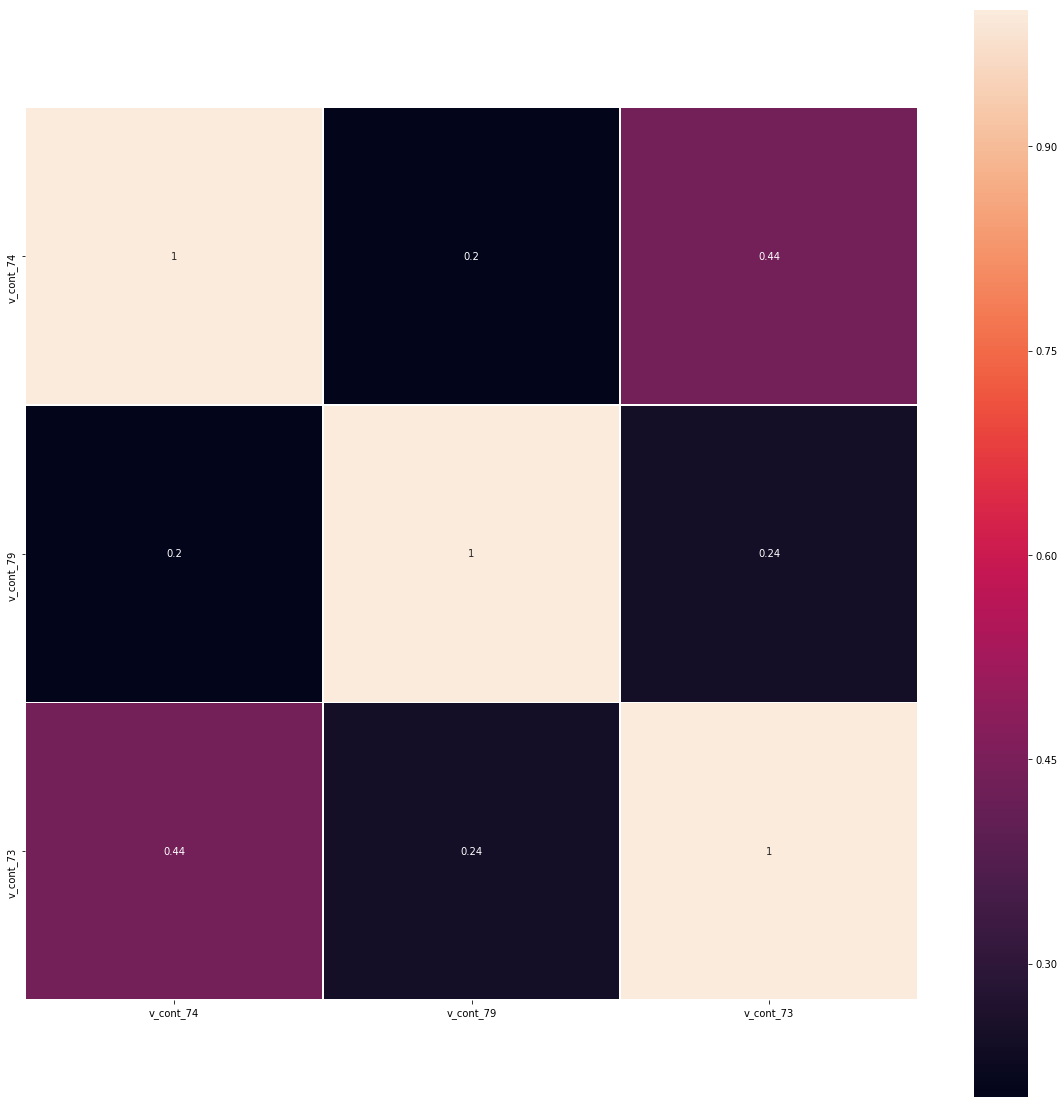

In [34]:
Indfor ={}
for ind,x in enumerate(FinalFeatureSet):
    if(x[1] not in Indfor):
        Indfor[x[1]] = x[1]
print len(Indfor)
IndforCor =[]
for key,val in Indfor.items():
    IndforCor.append(val)
Cols=[]
FinalcorMatrix = np.zeros((len(Indfor),len(Indfor)))
for i in range(FinalcorMatrix.shape[0]):
    Cols.append(X.columns[IndforCor[i]])
    for j in range(FinalcorMatrix.shape[1]):
        t1,t2 = pearsonr(Matrix[:,IndforCor[i]],Matrix[:,IndforCor[j]])
        FinalcorMatrix[i][j] = t1
        
fig, ax = plt.subplots(figsize=(20,20)) 
sb.heatmap(FinalcorMatrix, 
        xticklabels=Cols,
        yticklabels=Cols,linewidths=1,annot=True, ax=ax,square =True)

plt.show()

In [35]:
print IndforCor

[72, 77, 71]


### Linear regression on the remaining features

In [36]:
FinalTrainSetForTrain = np.zeros((3,Matrix.shape[0]))
for ind,k in enumerate(IndforCor):
    FinalTrainSetForTrain[ind] = (Matrix[:,k]) 
FinalTrainSetForTrain = FinalTrainSetForTrain.T
X_train,X_test,Y_train,Y_test = train_test_split(FinalTrainSetForTrain,Y,test_size = 0.3,random_state=42)
#Normal Linear Regression

clf = linear_model.LinearRegression(normalize = True)
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
Weights = clf.coef_
print "RMSE %.2f" % math.sqrt(mean_squared_error(Y_test,Y_pred))
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

# Linear Regression With Ridge regularisation
clf = linear_model.Ridge(alpha = 0.1,normalize = True)
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
print "RMSE %.2f" % math.sqrt(mean_squared_error(Y_test,Y_pred))
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))


# Linear Regression With Lasso regularisation
clf = linear_model.Lasso(alpha = 0.1,normalize = True)
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
print "RMSE %.2f" % math.sqrt(mean_squared_error(Y_test,Y_pred))
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))


RMSE 0.17
Variance score: 0.42
RMSE 0.17
Variance score: 0.42
RMSE 0.22
Variance score: -0.01
